<a href="https://colab.research.google.com/github/aamirigithub/AI4Cyber/blob/main/Exam2_Q2_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Load the phishing dataset
data = pd.read_csv("Malicious And Benign URLs.csv")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data["url"], data["type"], test_size=0.2, random_state=42)

# Transform the URLs into a matrix of token counts
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier on the training data
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Use the trained classifier to predict the types of URLs in the testing set
y_pred = clf.predict(X_test_counts)

# Print the classification report
print(classification_report(X_test, y_pred))


              precision    recall  f1-score   support

      benign       0.99      1.00      1.00     68921
   malicious       1.00      0.98      0.99     21115

    accuracy                           1.00     90036
   macro avg       1.00      0.99      0.99     90036
weighted avg       1.00      1.00      1.00     90036



In [10]:
# Privides the dataset file dimention in Rows x Columns
print(data.shape) 

# Load the data as table
data.head()

# Number of counts for type column
data.type.value_counts()

(450176, 2)


benign       345738
malicious    104438
Name: type, dtype: int64

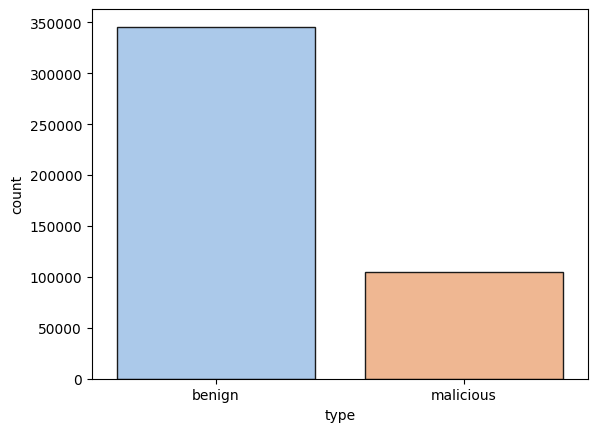

In [24]:
ax = sns.countplot(x ="type", data=data, palette="pastel", edgecolor=".1")

In [20]:
# Test the classifier on the testing data
accuracy = clf.score(X_test_counts, y_pred)
print("Accuracy: %0.3f" % accuracy)

Accuracy: 1.000


<Axes: >

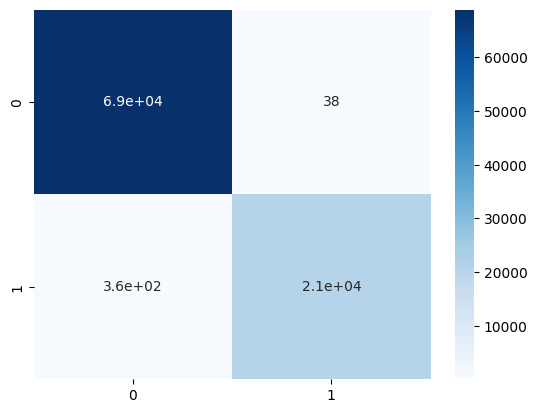

In [22]:
# Statistical Data Visualization
import seaborn as sns

# Generate the confusion matrix and plot it
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
#plt.show()

In [21]:
# Predict the type of a new URL using the trained classifier
new_url = "https://example.com/login.php"
new_url_features = vectorizer.transform([new_url])
prediction = clf.predict(new_url_features)
print("Prediction:", prediction)

Prediction: ['malicious']
